# Mapa del CMB

In [ ]:
import numpy as np 
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from astropy.units import deg
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2
from numpy import random
from scipy import signal
import matplotlib as mpl

In [2]:
#leyendo los datos del archivo original
df = pd.read_csv('D_ell.csv')
col1 = df.ell
col2 = df.D_ell
d = (col1 + 1)*col1
#print(d)
c_ell = col2 / (d/(2*pi))
C_ell = round(c_ell,10)

In [3]:
#Calculando M~
def M1_ell(X,Y):
    a=[[0 for i in range(0, 3085, 1)]for j in range(0, 3085, 1)]
    matrix = []
    for i in range(0, 3085, 1):
        sub = []
        #print(i)
        for j in range(0, 3085, 1):
            #print(j)
            if round(np.sqrt(i**2 + j**2))>=2 and round(np.sqrt(i**2 + j**2))<=5049:
                #print(np.sqrt(i**2 + j**2))
                #modulo = round(np.sqrt(i**2 + j**2))
                #print(modulo)
                #mod = round(modulo)
                #print(round(np.sqrt(i**2 + j**2)))
                n = a[i][j] = C_ell[round(np.sqrt(i**2 + j**2))]
            else:
                n = a[i][j] = 0
            #print(i,j)
            #print(a[i][j])
                #matrix.append(sub)
            sub.append(n)
        matrix.append(sub)
    return matrix #np.array(matrix)

In [4]:
X = np.linspace(0, 3085, 3085)
Y = np.linspace(0, 3085, 3085)
x = np.linspace(0, 3085, 3085)
y = np.linspace(0, 3085, 3085)

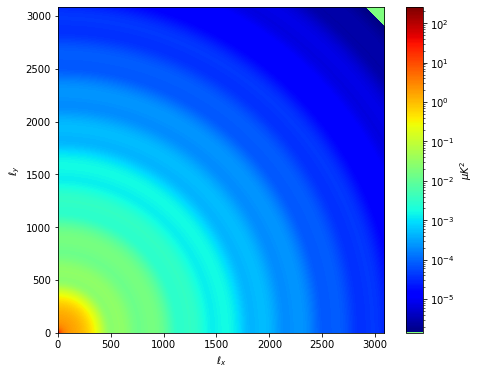

In [5]:
#Graficando M~
plt.figure(figsize=(8,6))
plt.ylim(0, 3085)

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, 1.0, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

image = plt.imshow(M1_ell(x,y), cmap=cmap, norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('$\mu K^2$', rotation=90)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
fig1 = plt.gcf()
fig1.savefig('M_tilde.png', dpi=100)
plt.show()

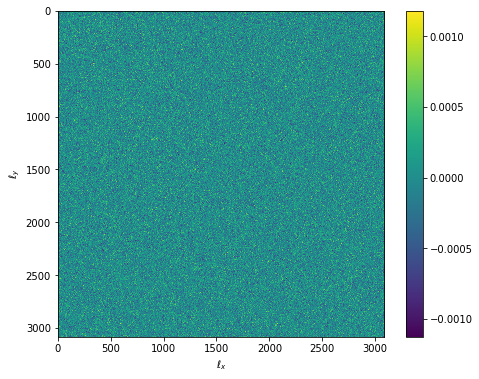

<Figure size 432x288 with 0 Axes>

In [6]:
#Obteniendo la Gaussiana en 2D
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(3085,3085))
G_ell = np.fft.ifft2(X) #espacio real

plt.figure(figsize=(8,6))
plt.ylim(0,3085)
plt.imshow(G_ell.real)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
plt.colorbar()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('G_ell.png', dpi=100)

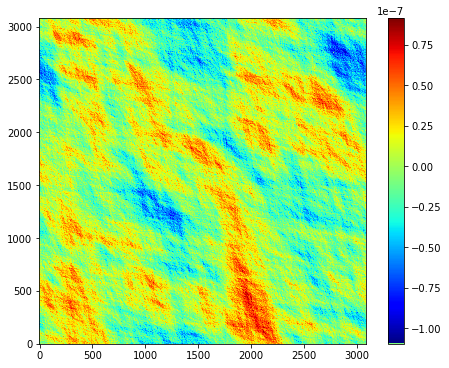

<Figure size 432x288 with 0 Axes>

In [16]:
#Obteniendo M
from scipy import fftpack
Z = M1_ell(x,y)*G_ell
M_theta = np.fft.ifft2(Z)

#Graficando M
plt.figure(figsize=(8,6))
plt.ylim(0,3085)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, 1.0, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(M_theta.real, cmap=cmap)
plt.colorbar()
cbar.set_label('$Temperatura [\mu K]$', rotation=90)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('M_tetha.png', dpi=100)

In [ ]:
#Graficando M reescalada
plt.imshow(M_theta.real)
scale_factor = 2*pi*57.2958 #pasando a grados
xmin = scale_factor/36
xmax = scale_factor/3085
ymin = scale_factor/36
ymax = scale_factor/3085

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.clim(-400, 400);
plt.colorbar()
cbar.set_label('$Temperatura [\mu K]$', rotation=90)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('M_tetha-2.png', dpi=100)

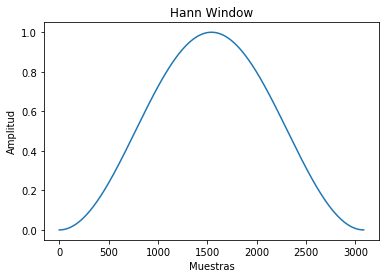

In [19]:
#Obteniendo la función ventana
window = signal.hann(3085)
plt.plot(window)
plt.title("Hann Window")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
fig3 = plt.gcf()
fig3.savefig('window.png', dpi=100)
plt.show()


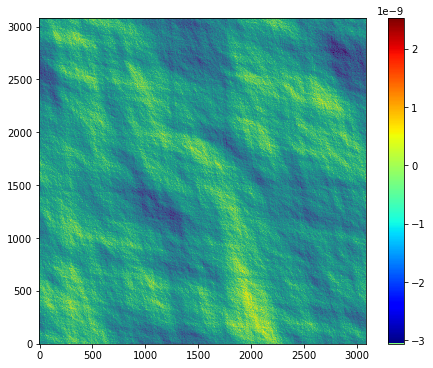

<Figure size 432x288 with 0 Axes>

In [20]:
#Oteniendo el mapa apodizado
M_apod = np.multiply(M_theta.real,window)
M2_ell = np.fft.ifft2(M_apod)

fig, ax = plt.subplots(figsize=(8,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, 1.0, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(M2_ell.real, cmap=cmap)
plt.colorbar()
plt.imshow(M_theta.real)
#plt.clim(-400, 400)
plt.ylim(0,3085)
cbar.set_label('$Temperatura [\mu K]$', rotation=90)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
fig3 = plt.gcf()
fig3.savefig('M2_ell.png', dpi=100)
plt.show()
plt.draw()


In [ ]:
#Oteniendo el mapa apodizado reescalado

fig, ax = plt.subplots(figsize=(8,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, 1.0, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(M2_ell.real, cmap=cmap)
plt.colorbar()
plt.imshow(M_theta.real)
plt.clim(-400, 400)
scale_factor = 2*pi*57.2958
xmin = scale_factor/36
xmax = scale_factor/3085
ymin = scale_factor/36
ymax = scale_factor/3085

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
cbar.set_label('$Temperatura [\mu K]$', rotation=90)
plt.xlabel("$\ell_x$")
plt.ylabel("$\ell_y$")
fig3 = plt.gcf()
fig3.savefig('M2_ell-2.png', dpi=100)
plt.show()
plt.draw()

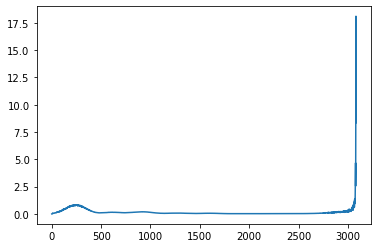

In [28]:
ell_max = 3085
ell = np.arange(ell_max) # el tamaño de esto debe ser igual a un lado de M1_ell
ell_x, ell_y = np.meshgrid(ell, ell) # esto genera dos matrices para los índices en (x,y)
ell_dist = (ell_x**2 + ell_y**2)**0.5
C2_ell = np.zeros(ell_max)
D2_ell = np.zeros(ell_max)
for i in range(ell_max):
    mask = (ell_dist > i) & (ell_dist <= i+1)
    C2_ell[i] = abs(M_tilde2)[mask].mean()
    D2_ell[i]= (i*(i+1)*C2_ell[i])/(2*pi)

plt.xlabel("$\ell$")
plt.ylabel("$D_\ell$")
plt.plot(ell,D2_ell)
fig3 = plt.gcf()
fig3.savefig('D2_ell.png', dpi=100)
plt.show()

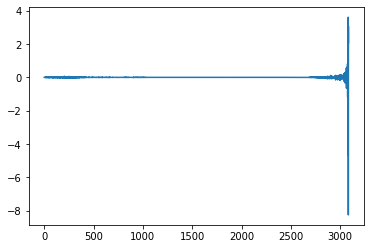

In [27]:
ell_max = 3085
ell = np.arange(ell_max) # el tamaño de esto debe ser igual a un lado de M1_ell
ell_x, ell_y = np.meshgrid(ell, ell) # esto genera dos matrices para los índices en (x,y)
ell_dist = (ell_x**2 + ell_y**2)**0.5
C2_ell = np.zeros(ell_max)
D2_ell = np.zeros(ell_max)
for i in range(ell_max):
    mask = (ell_dist > i) & (ell_dist <= i+1)
    C2_ell[i] = M_tilde2.real[mask].mean()
    D2_ell[i]= (i*(i+1)*C2_ell[i])/(2*pi)

plt.xlabel("$\ell$")
plt.ylabel("$D_\ell$")
plt.plot(ell,D2_ell)
fig3 = plt.gcf()
fig3.savefig('D2_ell_real.png', dpi=100)
plt.show()

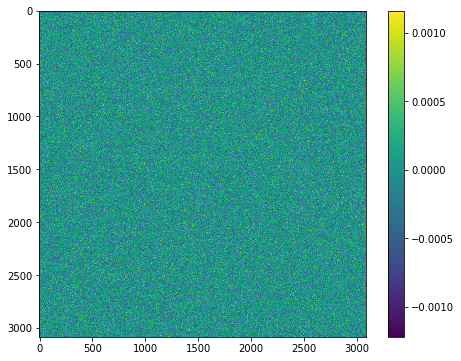

<Figure size 432x288 with 0 Axes>

In [37]:
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(3085,3085))
N_ell = np.fft.ifft2(X) #espacio real

plt.figure(figsize=(8,6))
plt.ylim(0,3085)
plt.imshow(N_ell.real)
plt.colorbar()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('N_ell.png', dpi=100)

 ...]

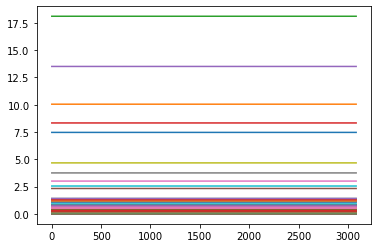

In [40]:
plt.plot(D2_ell-N_ell.real)
plt.xlabel("$\ell$")
plt.ylabel("$D_\ell$")
plt.plot(ell,D2_ell)
fig3 = plt.gcf()
fig3.savefig('resta.png', dpi=100)
plt.show()

In [46]:
transfer='CLASS'
Df_ell = (D2_ell-N_ell)/transfer

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
import sys, platform, os
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(3085, lens_potential_accuracy=0);
results = camb.get_transfer_functions(pars)

In [51]:
Df_ell = (D2_ell-N_ell)/results

ValueError: 'T{T{<i:_WantCls:<i:_WantTransfer:<i:_WantScalars:<i:_WantTensors:<i:_WantVectors:<i:_WantDerivedParameters:<i:_Want_cl_2D_array:<i:_Want_CMB:<i:_Want_CMB_lensing:<i:_DoLensing:<i:_NonLinear:T{<i:_high_precision:<i:_accurate_massive_neutrinos:<d:kmax:<i:k_per_logint:<i:PK_num_redshifts:(150)<d:_PK_redshifts:}:Transfer:<i:_want_zstar:<i:_want_zdrag:<i:min_l:<i:max_l:<i:max_l_tensor:<d:max_eta_k:<d:max_eta_k_tensor:<d:ombh2:<d:omch2:<d:omk:<d:omnuh2:<d:H0:<d:TCMB:<d:YHe:<d:num_nu_massless:<i:num_nu_massive:<i:nu_mass_eigenstates:<i:_share_delta_neff:(5)<d:_nu_mass_degeneracies:(5)<d:_nu_mass_fractions:(5)<i:_nu_mass_numbers:T{(2)<P:allocatable:}:_InitPower:T{(2)<P:allocatable:}:_Recomb:T{(2)<P:allocatable:}:_Reion:T{(2)<P:allocatable:}:_DarkEnergy:T{(2)<P:allocatable:}:_NonLinearModel:T{<d:AccuracyBoost:<d:lSampleBoost:<d:lAccuracyBoost:<i:_AccuratePolarization:<i:_AccurateBB:<i:_AccurateReionization:<d:TimeStepBoost:<d:BackgroundTimeStepBoost:<d:IntTolBoost:<d:SourcekAccuracyBoost:<d:IntkAccuracyBoost:<d:TransferkBoost:<d:NonFlatIntAccuracyBoost:<d:BessIntBoost:<d:LensingBoost:<d:NonlinSourceBoost:<d:BesselBoost:<d:LimberBoost:<d:SourceLimberBoost:<d:KmaxBoost:<d:neutrino_q_boost:}:Accuracy:T{<i:_limber_windows:<i:limber_phi_lmin:<i:_counts_density:<i:_counts_redshift:<i:_counts_lensing:<i:_counts_velocity:<i:_counts_radial:<i:_counts_timedelay:<i:_counts_ISW:<i:_counts_potential:<i:_counts_evolve:<i:_line_phot_dipole:<i:_line_phot_quadrupole:<i:_line_basic:<i:_line_distortions:<i:_line_extra:<i:_line_reionization:<i:_use_21cm_mK:}:SourceTerms:T{(6)<P:allocatable:}:_z_outputs:<i:_scalar_initial_condition:T{(6)<P:allocatable:}:_InitialConditionVector:<i:OutputNormalization:<d:Alens:<i:_MassiveNuMethod:<i:_DoLateRadTruncation:<i:_Evolve_baryon_cs:<i:_Evolve_delta_xe:<i:_Evolve_delta_Ts:<i:_Do21cm:<i:_transfer_21cm_cl:<i:_Log_lvalues:<i:_use_cl_spline_template:T{(6)<P:allocatable:}:_SourceWindows:T{<i:num_custom_sources:<P:c_source_func:T{(6)<P:allocatable:}:_custom_source_ell_scales:}:CustomSources:}:_Params:(13)<d:ThermoDerivedParams:<i:_flat:<i:_closed:<d:grhocrit:<d:grhog:<d:grhor:<d:grhob:<d:grhoc:<d:grhov:<d:grhornomass:<d:grhok:<d:taurst:<d:dtaurec:<d:taurend:<d:tau_maxvis:<d:adotrad:<d:omega_de:<d:curv:<d:curvature_radius:<d:Ksign:<d:tau0:<d:chi0:<d:scale:<d:akthom:<d:fHe:<d:Nnow:<d:z_eq:(5)<d:grhormass:(5)<d:nu_masses:<i:num_transfer_redshifts:T{(6)<P:allocatable:}:_transfer_redshifts:(150)<i:PK_redshifts_index:<i:_OnlyTransfers:<i:_HasScalarTimeSources:}' is not a valid PEP 3118 buffer format string